In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train=pd.read_csv("/content/train.csv")

In [3]:
test=pd.read_csv("/content/test.csv")

In [4]:
test_id= test['id']

In [5]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:

train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
train=train.drop(['CustomerId','Surname'],axis=1)

In [8]:
test=test.drop(['CustomerId','Surname'],axis=1)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CreditScore      110023 non-null  int64  
 2   Geography        110023 non-null  object 
 3   Gender           110023 non-null  object 
 4   Age              110023 non-null  float64
 5   Tenure           110023 non-null  int64  
 6   Balance          110023 non-null  float64
 7   NumOfProducts    110023 non-null  int64  
 8   HasCrCard        110023 non-null  float64
 9   IsActiveMember   110023 non-null  float64
 10  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 9.2+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 15.1+ MB


In [10]:
#hot encoding of non categorial values
train = pd.get_dummies(train,columns=['Geography','Gender'],drop_first=True)

In [11]:
test = pd.get_dummies(test,columns=['Geography','Gender'],drop_first=True)

In [ ]:
test.values

array([[1.65034e+05, 5.86000e+02, 2.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.65035e+05, 6.83000e+02, 4.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.65036e+05, 6.56000e+02, 3.40000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.75054e+05, 7.12000e+02, 3.10000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.75055e+05, 7.09000e+02, 3.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.75056e+05, 6.21000e+02, 3.70000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

<ipython-input-12-7ab23b372530>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Exited', data=train, ci=None, palette='viridis')
<ipython-input-12-7ab23b372530>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Exited', data=train, ci=None, palette='viridis')


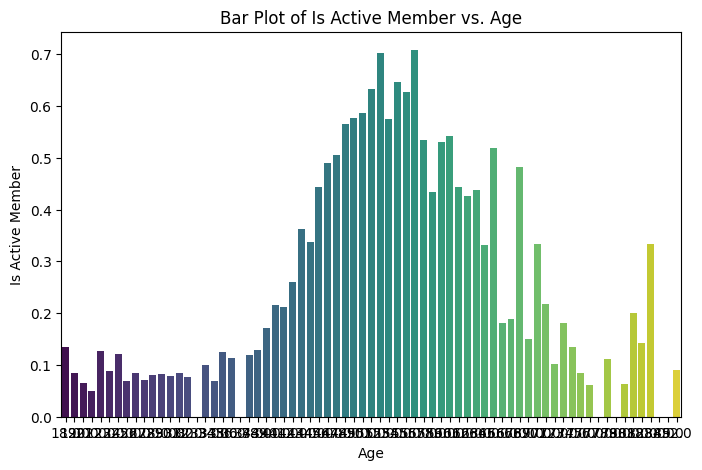

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Exited', data=train, ci=None, palette='viridis')


plt.xlabel('Age')
plt.ylabel('Is Active Member')
plt.title('Bar Plot of Is Active Member vs. Age')

plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   CreditScore        165034 non-null  int64  
 2   Age                165034 non-null  float64
 3   Tenure             165034 non-null  int64  
 4   Balance            165034 non-null  float64
 5   NumOfProducts      165034 non-null  int64  
 6   HasCrCard          165034 non-null  float64
 7   IsActiveMember     165034 non-null  float64
 8   EstimatedSalary    165034 non-null  float64
 9   Exited             165034 non-null  int64  
 10  Geography_Germany  165034 non-null  uint8  
 11  Geography_Spain    165034 non-null  uint8  
 12  Gender_Male        165034 non-null  uint8  
dtypes: float64(5), int64(5), uint8(3)
memory usage: 13.1 MB


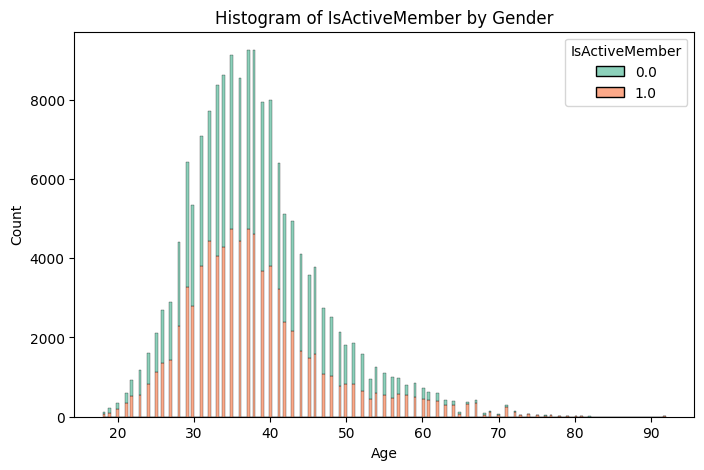

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(x='Age', hue='IsActiveMember', data=train, multiple='stack', palette='Set2')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of IsActiveMember by Gender')

plt.show()

In [16]:
#doing feature seperating
X=train[['id',	'CreditScore',	'Age',	'Tenure','Balance',	'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary',	'Geography_Germany','Geography_Spain','Gender_Male']]
y=train['Exited']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=1)


In [20]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.8615748174629624


In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.73      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007

Confusion Matrix:
 [[24678  1374]
 [ 3195  3760]]


In [24]:
y_pred = rf_model.predict(X_train)

In [25]:
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [26]:
print("Classification Report:\n", classification_report(y_train, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104061
           1       1.00      1.00      1.00     27966

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

Confusion Matrix:
 [[104061      0]
 [     3  27963]]


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:

logreg_model = LogisticRegression(random_state=42)

#model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:

y_pred = logreg_model.predict(X_test)


In [30]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     26052
           1       0.00      0.00      0.00      6955

    accuracy                           0.79     33007
   macro avg       0.39      0.50      0.44     33007
weighted avg       0.62      0.79      0.70     33007

Confusion Matrix:
 [[26052     0]
 [ 6955     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier()

In [34]:
#data fitting
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.tree import plot_tree

In [36]:
plt.figure(figsize=(15,10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [37]:
m_pred = tree_model.predict(X_test)

In [38]:
m_pred

array([0, 0, 1, ..., 1, 0, 0])

In [39]:
score = accuracy_score(m_pred,y_test)

In [40]:
score

0.7966188990214197

In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     26052
           1       0.00      0.00      0.00      6955

    accuracy                           0.79     33007
   macro avg       0.39      0.50      0.44     33007
weighted avg       0.62      0.79      0.70     33007

Confusion Matrix:
 [[26052     0]
 [ 6955     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# train_head = train.head(165033)

In [ ]:
# csv_file_path = '/content/train_head.csv'

In [ ]:
# train_head.to_csv(csv_file_path, index=False)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
k_value = 5
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [46]:
y_pred1 = knn_model.predict(X_test_scaled)


In [47]:
y_pred1

array([0, 0, 1, ..., 1, 0, 0])

In [48]:
#model evaluate
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred1))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred1))


Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     26052
           1       0.66      0.53      0.59      6955

    accuracy                           0.84     33007
   macro avg       0.77      0.73      0.75     33007
weighted avg       0.83      0.84      0.84     33007


Confusion Matrix:
[[24206  1846]
 [ 3298  3657]]


In [49]:
!pip install xgboost
!pip install scikit-learn


In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [52]:
params = {
    'objective': 'binary:logistic',  # for binary classification problems
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}


In [53]:
num_rounds = 100

model = xgb.train(params, dtrain, num_rounds)


In [54]:
predictions = model.predict(dtest)


In [55]:
threshold = 0.5
y_pred = [1 if pred > threshold else 0 for pred in predictions]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8667858333080861


In [56]:
!pip install lightgbm


In [57]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [58]:
# Assuming you have a DataFrame called 'df' with features and target variable
X=train[['id',	'CreditScore',	'Age',	'Tenure','Balance',	'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary',	'Geography_Germany','Geography_Spain','Gender_Male']]
y=train['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [60]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}


In [61]:
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])


[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1115
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


In [62]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


In [63]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8669373163268398


In [ ]:
# bst.save_model('lightgbm_model.txt')


In [64]:
# Predict probabilities
test_predictions = bst.predict(test, num_iteration=bst.best_iteration)


In [65]:
# Create a DataFrame with 'id' and 'Exited' columns
submission_df = pd.DataFrame({'id': test_id, 'Exited': test_predictions})
submission_df['Exited'] = submission_df['Exited'].round(1)

In [66]:
# Save the submission file
submission_df.to_csv('submission.csv', index=False)


In [67]:
print(submission_df.head())


       id  Exited
0  165034     0.0
1  165035     0.8
2  165036     0.0
3  165037     0.2
4  165038     0.3
